In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

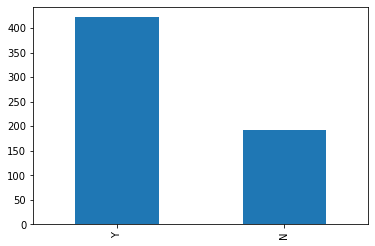

In [8]:
train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

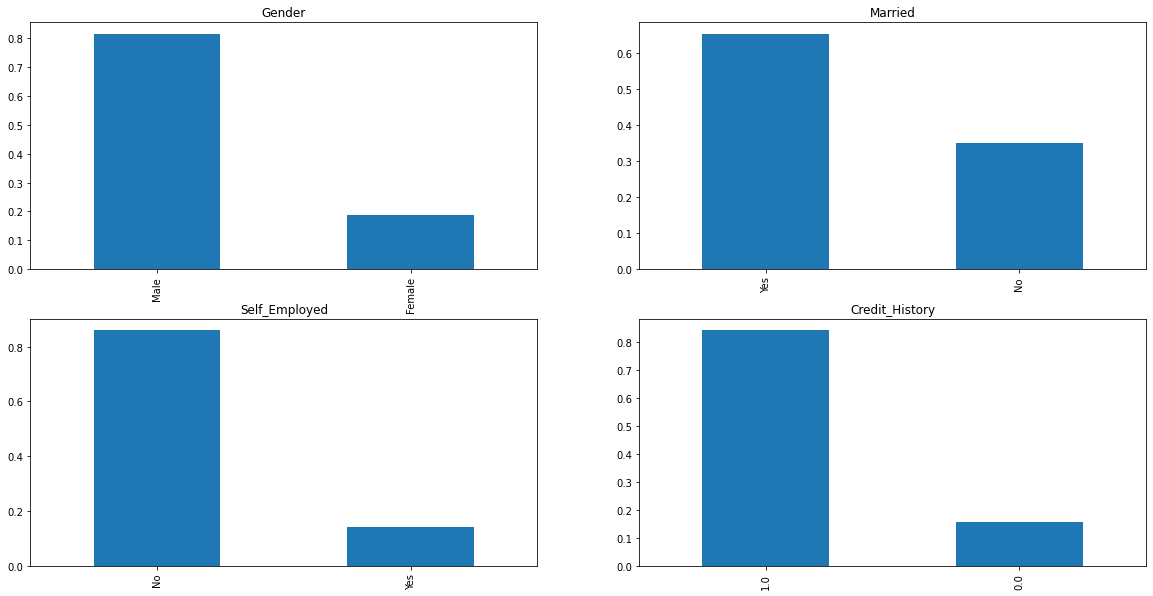

In [9]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")

<AxesSubplot:title={'center':'Property_Area'}>

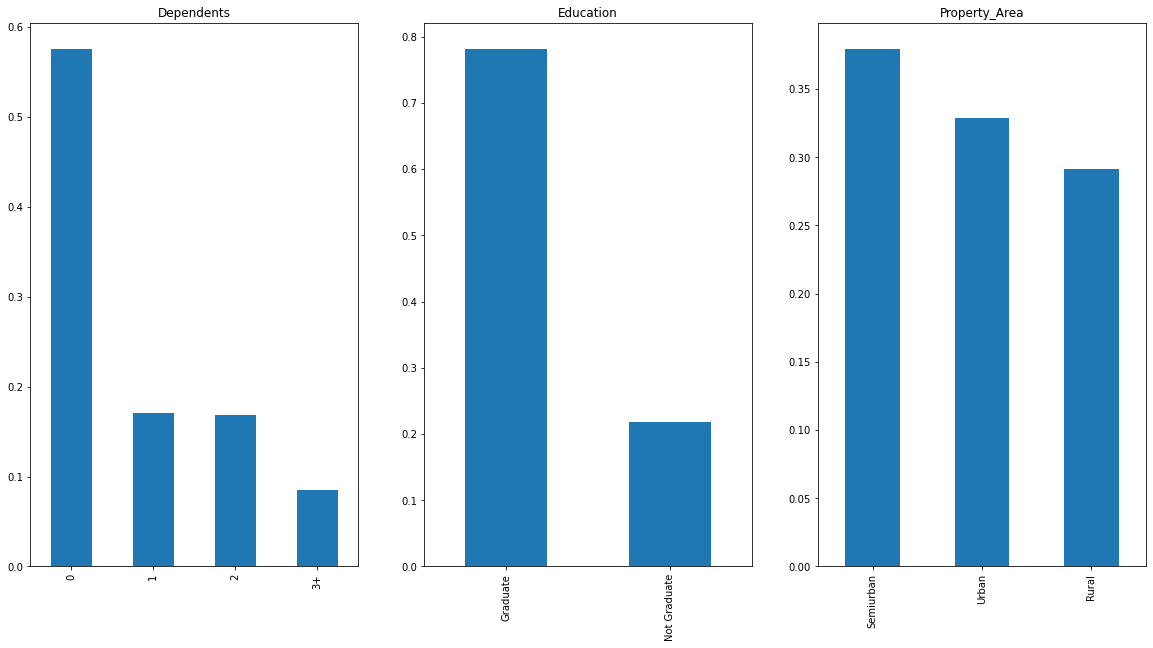

In [10]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Property_Area")

<AxesSubplot:>

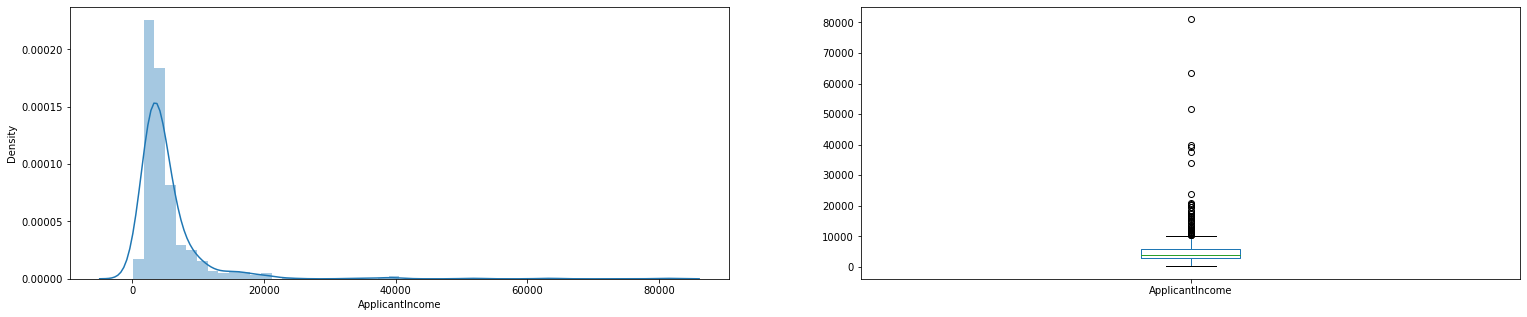

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(26,5))

Text(0.5, 0.98, '')

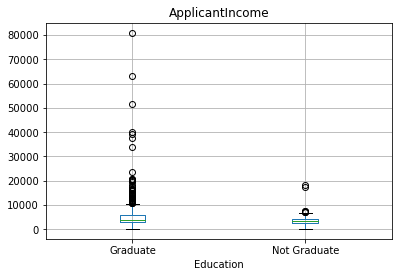

In [12]:
train.boxplot(column='ApplicantIncome',by='Education') 
plt.suptitle("")

<AxesSubplot:>

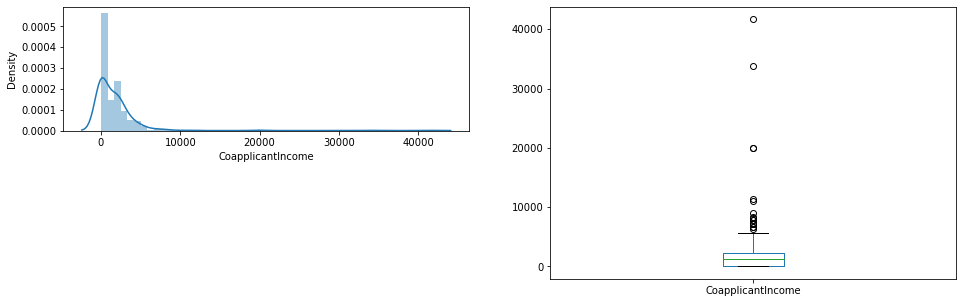

In [13]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

<AxesSubplot:>

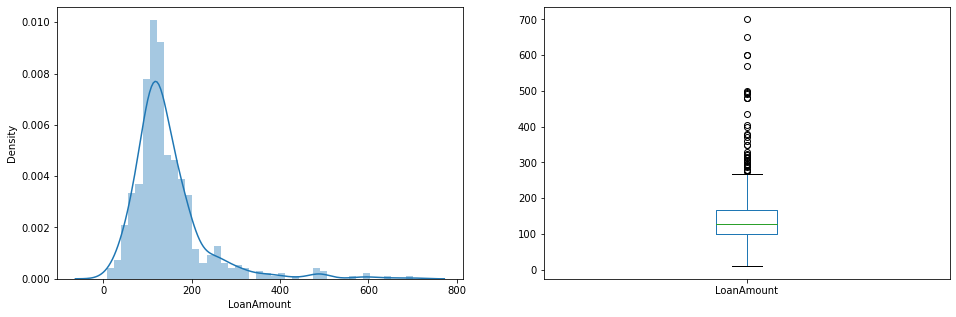

In [14]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

<AxesSubplot:xlabel='Gender'>

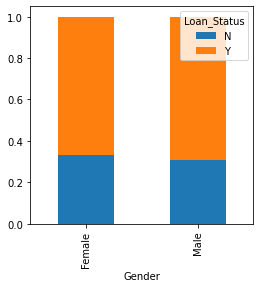

In [15]:
Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

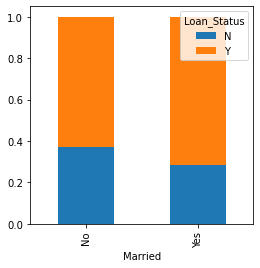

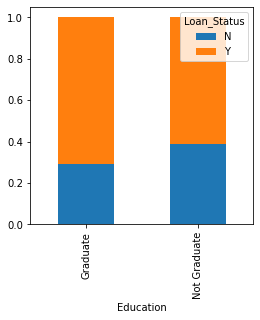

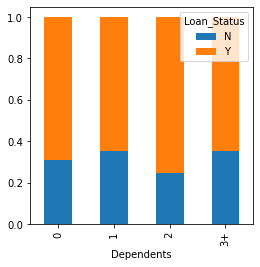

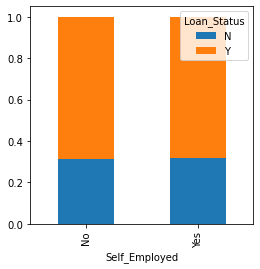

In [16]:
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

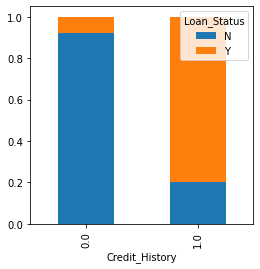

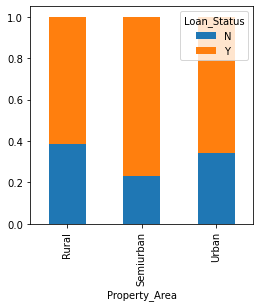

In [17]:
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))

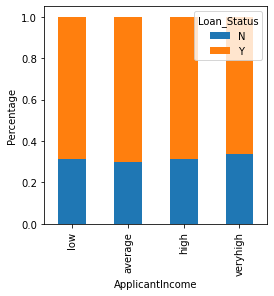

In [18]:
bins=[0,2500,4000,6000,81000]
group=['low','average','high','veryhigh']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_Bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

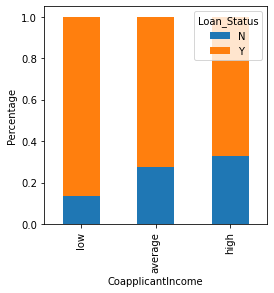

In [19]:
bins=[0,1000,3000,42000]
group=['low','average','high']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

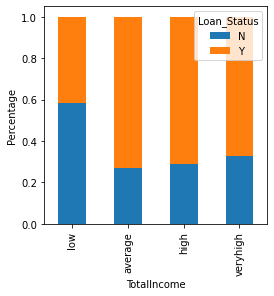

In [20]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['low','average','high','veryhigh']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.xlabel('TotalIncome')
P=plt.ylabel('Percentage')

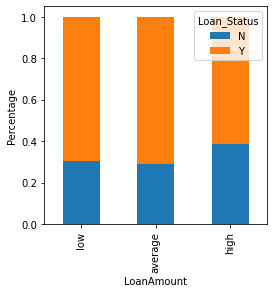

In [21]:
bins=[0,100,200,700]
group=['low','average','high']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True",figsize=(4,4))
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

<AxesSubplot:>

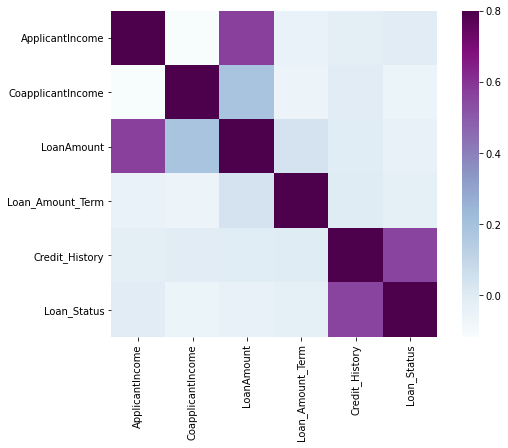

In [22]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income_bin','LoanAmount_bin','Total_Income'],axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

matrix=train.corr() 
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square='True', cmap="BuPu")

In [23]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [25]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

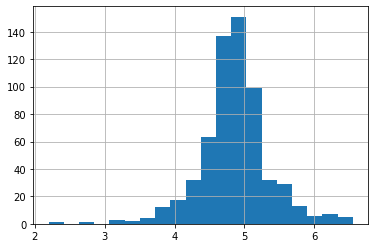

In [27]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [28]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [29]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status

In [30]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y, test_size=0.3)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='l2',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8108108108108109

In [32]:
pred_test=model.predict(test)

In [33]:
from sklearn.model_selection import StratifiedKFold

i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.8048780487804879

2 of kfold5
accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7804878048780488

4 of kfold5
accuracy_score 0.7886178861788617

5 of kfold5
accuracy_score 0.7950819672131147


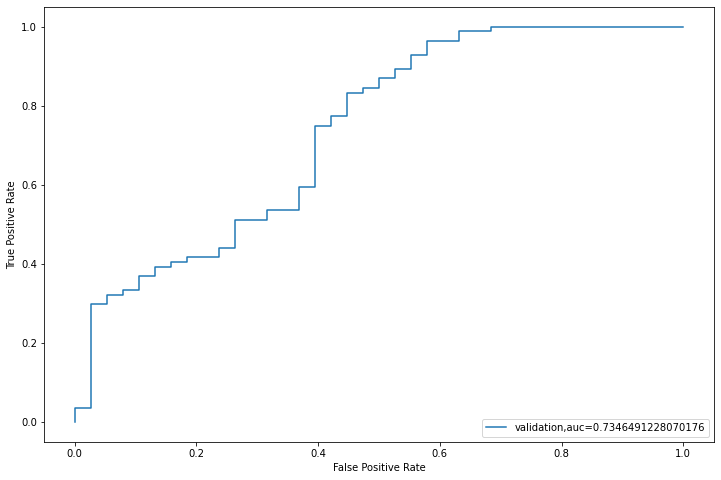

In [34]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)


In [35]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

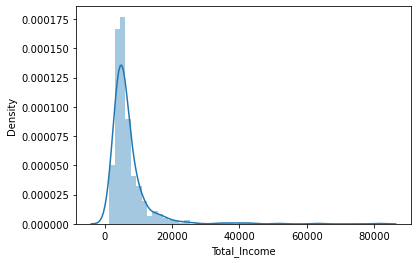

In [36]:
sns.distplot(train['Total_Income']);

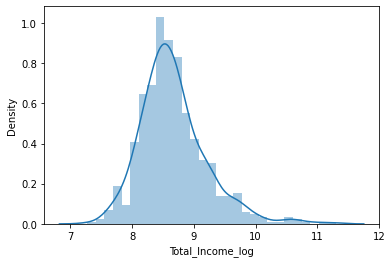

In [37]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log']=np.log(test['Total_Income'])

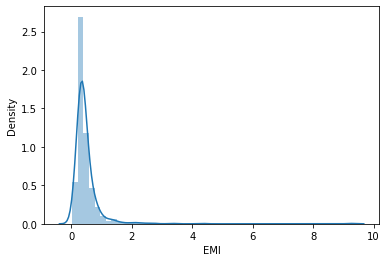

In [38]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI']);

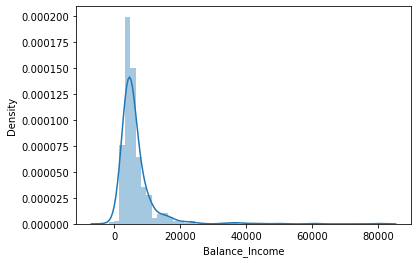

In [39]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income']);

In [40]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [41]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status

In [42]:
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.7886178861788617

2 of kfold5
accuracy_score 0.6910569105691057

3 of kfold5
accuracy_score 0.6666666666666666

4 of kfold5
accuracy_score 0.7804878048780488

5 of kfold5
accuracy_score 0.680327868852459


In [54]:
from sklearn import tree
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.7398373983739838

2 of kfold5
accuracy_score 0.6991869918699187

3 of kfold5
accuracy_score 0.7560975609756098

4 of kfold5
accuracy_score 0.7073170731707317

5 of kfold5
accuracy_score 0.6721311475409836


In [59]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.8292682926829268

2 of kfold5
accuracy_score 0.8130081300813008

3 of kfold5
accuracy_score 0.7723577235772358

4 of kfold5
accuracy_score 0.8048780487804879

5 of kfold5
accuracy_score 0.7540983606557377


In [63]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size=0.3,random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None,error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                                              criterion='gini', max_depth=None, max_features='auto', 
                                              max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                              min_impurity_split=None, min_samples_leaf=1, 
                                              min_samples_split=2, min_weight_fraction_leaf=0.0, 
                                              n_estimators=10, n_jobs=1, oob_score=False, 
                                              random_state=1, verbose=0, warm_start=False),iid=True, n_jobs=1,
             param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19],'n_estimators':[1,21,41,61,81,101,121,141,161,181]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None,verbose=0)
grid_search.best_estimator_
RandomForestClassifier(bootstrap=True,class_weight=None,
                       criterion='gini',max_depth=3,max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                       min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1, 
                       oob_score=False, random_state=1, verbose=0, warm_start=False)

RandomForestClassifier(max_depth=3, n_estimators=41, n_jobs=1, random_state=1)

In [64]:
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.8130081300813008

2 of kfold5
accuracy_score 0.8455284552845529

3 of kfold5
accuracy_score 0.8048780487804879

4 of kfold5
accuracy_score 0.7967479674796748

5 of kfold5
accuracy_score 0.7786885245901639


<AxesSubplot:>

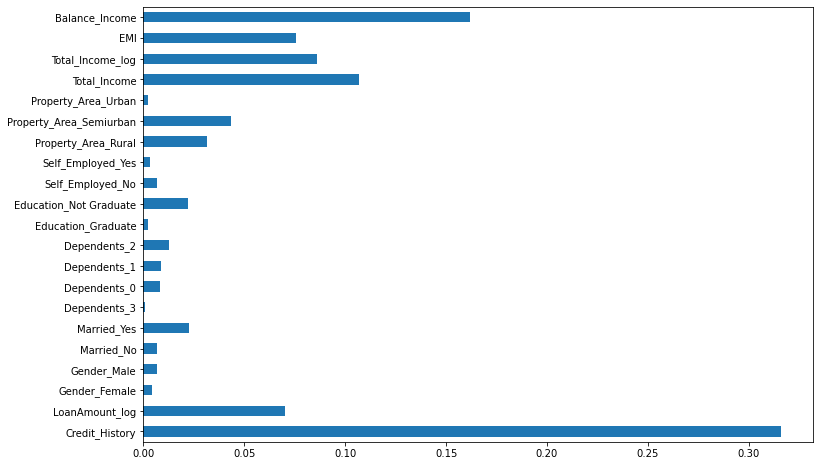

In [65]:
importances=pd.Series(model.feature_importances_,index=x.columns)
importances.plot(kind='barh',figsize=(12,8))

In [71]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from xgboost import XGBClassifier
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=XGBClassifier(max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold5
[13:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7804878048780488

2 of kfold5
[13:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7886178861788617

3 of kfold5
[13:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you